# All Data - Altman Z Outliers

In [1]:
# Flag for if you are running this on the sample dataset
sample = False
# Modify this path as needed to run on your machine
sample_path = r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates_sample.csv'

In [2]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [3]:
# Load in sample csv, or full parquet file
if sample:
    df = pd.read_csv(sample_path)
else:
    # Limit to items in the finalized dataset
    # list of files in '../../../Data/All_Data/All_Data_with_NLP_Features'
    import os
    file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_with_NLP_Features') if f.endswith('.parquet')]
    # read in all parquet files
    df = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_with_NLP_Features/' + f) for f in file_list])
df

,ticker,fixed_quarter_date,earnings_call_date,Rating,rating_date,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,...,Active,Passive,Ovrst,Undrst,PN,SW,AP,OU,TONE1,train_test_80_20
0,AAPL,2014-10-01,2014-07-22,AA,2014-05-27,AA,2015-02-18,AAA,2014-04-24,2015-02-18,...,495.0,186.0,364.0,131.0,5.518519,15.261905,2.661290,2.778626,3.188264,test
1,AAPL,2015-01-01,2014-10-20,AA,2014-05-27,AA,2015-02-18,AAA,2014-04-24,2015-02-18,...,656.0,199.0,465.0,152.0,5.348485,15.934783,3.296482,3.059211,3.681858,test
2,AAPL,2015-04-01,2015-01-27,AA,2015-02-18,AA,2015-05-28,AA,2014-05-27,2015-05-28,...,591.0,208.0,468.0,151.0,3.927711,8.113636,2.841346,3.099338,1.307366,train
3,AAPL,2015-07-01,2015-04-27,AA,2015-06-02,AA,2015-08-25,AA,2015-05-28,2015-08-25,...,565.0,214.0,415.0,135.0,5.250000,9.142857,2.640187,3.074074,2.025933,train
4,AAPL,2015-10-01,2015-07-21,AA,2015-08-25,AA,2016-05-20,AA,2015-06-02,2016-05-20,...,565.0,219.0,449.0,148.0,4.209877,10.442857,2.579909,3.033784,1.815531,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MHO,2013-10-01,2013-07-25,CC,2013-05-07,CC,2013-11-06,CCC,2012-11-29,2013-11-06,...,295.0,122.0,180.0,82.0,7.153846,10.225000,2.418033,2.195122,2.140598,train
563,MHO,2014-01-01,2013-10-24,CC,2013-11-06,CCC,2014-07-31,CC,2013-05-07,2014-07-31,...,462.0,152.0,294.0,166.0,4.516129,6.771084,3.039474,1.771084,-0.029287,train
564,MHO,2014-04-01,2014-01-29,CC,2013-11-06,CCC,2014-07-31,CC,2013-05-07,2014-07-31,...,444.0,136.0,325.0,158.0,3.835821,7.078947,3.264706,2.056962,0.084888,test
565,MHO,2014-07-01,2014-04-24,CC,2013-11-06,CCC,2014-07-31,CC,2013-05-07,2014-07-31,...,329.0,127.0,194.0,103.0,3.703704,6.944444,2.590551,1.883495,-0.319794,train


### Altman-Z outlier

In [4]:
df.columns[-40:]

Index(['eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'financial_statement_date', 'marketCap',
       'EBIT', 'common_plus_preferred_stock', 'workingCapital', 'Ratio_A',
       'Ratio_B', 'Ratio_C', 'Ratio_D', 'Ratio_E', 'Altman_Z', 'filingDate',
       'rating_on_previous_fixed_quarter_date', 'Investment_Grade',
       'Change Direction Since Last Fixed Quarter Date',
       'Change Since Last Fixed Quarter Date', 'Sector', 'num_transparency',
       'gf_score', 'word_count', 'num_questions', 'pos_score', 'Positiv',
       'Negativ', 'Strong', 'Weak', 'Active', 'Passive', 'Ovrst', 'Undrst',
       'PN', 'SW', 'AP', 'OU', 'TONE1', 'train_test_80_20'],
      dtype='object')

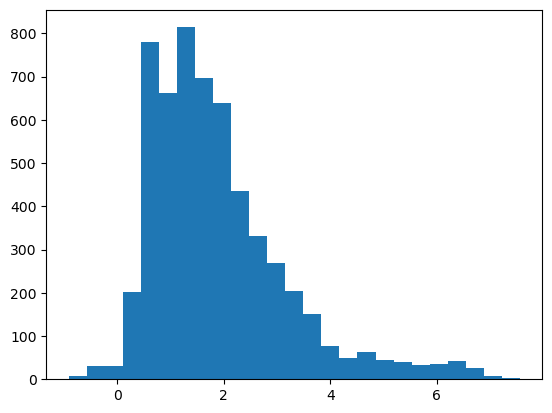

In [5]:
plt.hist(sorted(df.Altman_Z), bins = 25);

In [6]:
# companies with a Z score of 6 and above
high_altmanZ_df = df[df.Altman_Z > 6].drop_duplicates(["ticker", "Rating"])
display(high_altmanZ_df.Sector.value_counts())
display(high_altmanZ_df.ticker.unique())

Sector
Information Technology    6
Energy                    4
Consumer Discretionary    4
Health Care               2
Consumer Staples          1
Materials                 1
Name: count, dtype: int64

array(['CVX', 'GOOG', 'TXN', 'XOM', 'ADI', 'BIIB', 'HRL', 'ROST', 'SBUX',
       'FL', 'MSFT', 'GILD', 'GM', 'INTU', 'NEU'], dtype=object)

In [8]:
# Ratings for those with high Altman_Z score

# Encode rating
high_altmanZ_df["Rating Rank AAA is 10"] = high_altmanZ_df.Rating.replace({"AAA": 10, "AA": 9, "A": 8, "BBB": 7, "BB": 6, "B": 5, "CCC": 4, "CC": 3, "C": 2, "D": 1})
# value counts of Rating Rank and Rating
display(high_altmanZ_df[['Rating', 'Rating Rank AAA is 10']].value_counts().sort_index())

# Above 8 is around an average of "A" - "AA" rating, this makes sense
# didn't find any banks in the dataset - though it seems that models based on balance sheet don't work well on bank to begin with
high_altmanZ_df["Rating Rank AAA is 10"].mean()

Rating  Rating Rank AAA is 10
A       8                        5
AA      9                        4
AAA     10                       3
BB      6                        1
BBB     7                        5
Name: count, dtype: int64

8.166666666666666